# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

response = requests.get(url)

weather_json = response.json()

pprint(weather_json)

{'cod': '400', 'message': 'Nothing to geocode'}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=goderich
Processing Record 2 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=cape town
Processing Record 3 | Saiha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=saiha
Processing Record 4 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=srednekolymsk
Processing Record 5 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=havre-saint-pierre
Processing Record 6 | Basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=basco
Processing Record 7 | Saint George
http://api.openweathermap.org/

Processing Record 57 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=bandarbeyla
Processing Record 58 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=port hardy
Processing Record 59 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=carnarvon
Processing Record 60 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=arraial do cabo
Processing Record 61 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=guerrero negro
City not found. Skipping...
City not found. Skipping...
Processing Record 62 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=kaitangata
City not found. Skipping...
Processing

Processing Record 113 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=dubbo
Processing Record 114 | Mizan Teferi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=mizan teferi
City not found. Skipping...
Processing Record 115 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=alyangula
Processing Record 116 | Peace River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=peace river
Processing Record 117 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=avarua
City not found. Skipping...
Processing Record 118 | Samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=samana
Processing Record 119 | Hilo
http://api.openweathermap.org/data/2.5/weat

Processing Record 169 | Almeirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=almeirim
Processing Record 170 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=dikson
Processing Record 171 | Lafia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=lafia
Processing Record 172 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=anadyr
Processing Record 173 | Dubreka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=dubreka
Processing Record 174 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=byron bay
Processing Record 175 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=codrin

Processing Record 225 | Pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=pandan
City not found. Skipping...
City not found. Skipping...
Processing Record 226 | Vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=vilyuysk
Processing Record 227 | Gladstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=gladstone
City not found. Skipping...
Processing Record 228 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=touros
Processing Record 229 | Fivizzano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=fivizzano
Processing Record 230 | Eskisehir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=eskisehir
Processing Record 231 | Tuatapere
http://api.ope

Processing Record 281 | Ruteng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=ruteng
Processing Record 282 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=coahuayana
Processing Record 283 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=aksu
Processing Record 284 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=mount isa
Processing Record 285 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=nemuro
Processing Record 286 | Bograd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=bograd
Processing Record 287 | Mumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=mumford
P

Processing Record 338 | Gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=gao
Processing Record 339 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=bilibino
Processing Record 340 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=clyde river
Processing Record 341 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=ostrovnoy
Processing Record 342 | Chalus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=chalus
City not found. Skipping...
Processing Record 343 | Kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=kokopo
Processing Record 344 | Rorvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d

Processing Record 393 | Carndonagh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=carndonagh
Processing Record 394 | Elk Point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=elk point
Processing Record 395 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=buala
Processing Record 396 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=verkhnevilyuysk
Processing Record 397 | Malanville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=malanville
Processing Record 398 | Lakefield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=lakefield
Processing Record 399 | Kibiti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a048289

Processing Record 449 | Turtas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=turtas
Processing Record 450 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=margate
Processing Record 451 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=leningradskiy
Processing Record 452 | Satun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=satun
Processing Record 453 | Zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=zeya
Processing Record 454 | Abu Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=abu zabad
City not found. Skipping...
Processing Record 455 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a8

Processing Record 505 | Black River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=black river
City not found. Skipping...
Processing Record 506 | Araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=araouane
City not found. Skipping...
Processing Record 507 | Nenjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=nenjiang
Processing Record 508 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=buchanan
Processing Record 509 | Tapejara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=tapejara
Processing Record 510 | Urom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a84a0482890d3ec319ea524754167b6&q=urom
Processing Record 511 | Kishi
http://api.openweathermap.org/data/2.5/weather

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [8]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Goderich,100,CA,1573312092,62,43.74,-81.71,34.00,3.00
1,Cape Town,0,ZA,1573312093,37,-33.93,18.42,82.40,19.46
2,Saiha,100,IN,1573312094,97,22.49,92.98,64.65,3.00
3,Srednekolymsk,100,RU,1573312096,96,67.46,153.71,0.27,8.25
4,Havre-Saint-Pierre,1,CA,1573312097,45,50.23,-63.60,24.80,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

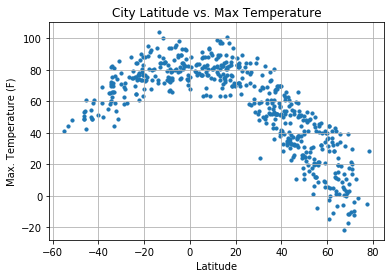

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

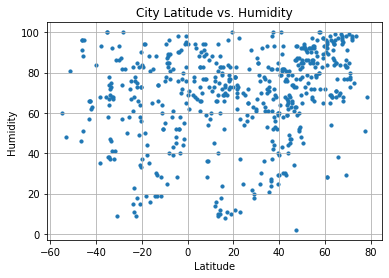

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

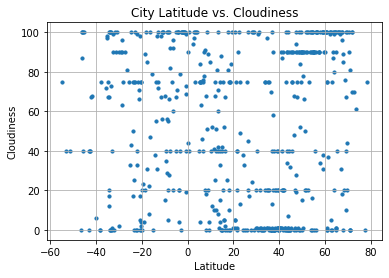

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

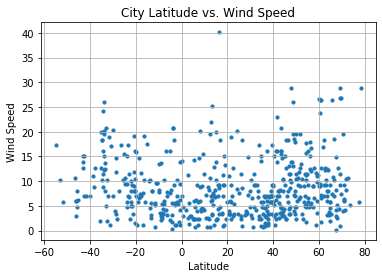

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_WS.png")

# Show plot
plt.show()